# Merge gclust and autogmm

This Notebook shows that the option of running multiple k-means initializations has been succesfully merged into autogmm

## Data Generation

For starter, let's generate 100 data points in $R^3$ from a Gaussian mixture model with $\pi_i = 1/3$ and $N_1(\mu = \begin{bmatrix}0\\0\\0\end{bmatrix}, \sigma = I)$, $N_2(\mu = \begin{bmatrix}5\\0\\0\end{bmatrix}, \sigma = I)$, $N_3(\mu = \begin{bmatrix}0\\5\\0\end{bmatrix}, \sigma = I)$

In [177]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pi = np.array([1/3,1/3,1/3]) #probability of each point to belong to cluster 1,2,3

mu0 = np.array([0,0,0]) #cluster 1 mean
mu1 = np.array([5,0,0]) #cluster 2 mean
mu2 = np.array([0,5,0]) #cluster 3 mean

mu = np.vstack((mu0,mu1,mu2))

sigma = np.identity(3) #Identity covariance matrix

n_obs_cluster = np.random.default_rng().multinomial(n = 100, pvals = pi) #sample how many points will belong to each cluster

#Generate data
data = [np.random.default_rng().multivariate_normal(mu[i], sigma, n_obs) for i, n_obs in enumerate(n_obs_cluster)]
data= np.vstack(data)

## Display data generated

Here is a visual confirmation that the clusters have been generated succesfully

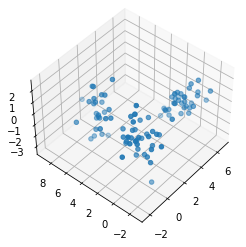

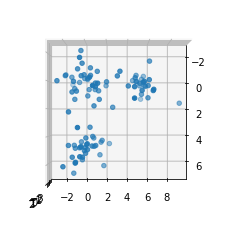

In [178]:
fig = plt.figure()
ax = plt.axes(projection='3d')


ax.scatter3D(data[:,0], data[:,1], data[:,2]);

# rotate the axes and update
for angle in range(0, 360):
   ax.view_init(45, 220)

fig2 = plt.figure()
ax2 = plt.axes(projection='3d')


ax2.scatter3D(data[:,0], data[:,1], data[:,2]);

# rotate the axes and update
for angle in range(0, 360):
   ax2.view_init(90, 0)

## Compare old autogmm output with new code output when run with n_init = 3

Now we will run on the synthetic data noth the old autogmm code and the new autogmm code with n_init = 3. Ideally we could use any number, this is just performed to show that new k_means run with multiple init are appened to the old autogmm output.

*Note that in following code AutoGMMCluster indicates the current AutoGMMCluster class present in graspologic, while AutoGMMCluster_new indicates the newly modified class defined in the last cell. For this reason, the last cell must be run before running this cell.*

In [179]:
from graspologic.cluster import AutoGMMCluster
pd.set_option('display.max_colwidth', -1)

min_components = 2
max_components = 3


agc = AutoGMMCluster(min_components=min_components , max_components= max_components , covariance_type='all', random_state=1) #current autoGMMCluster class
agc_new = AutoGMMCluster_new(min_components=min_components , max_components= max_components , covariance_type='all', n_init = 3, random_state=1) #AutoGMMCluster defined in last cell containing changed code

result = agc.fit(data)
result_new = agc_new.fit(data)


result_df = result.results_
result_new_df = result_new.results_

Let's look at the results of both fit methods for both classes

In [180]:
result_df# Look at current implementation results

,model,bic/aic,ari,n_components,affinity,linkage,covariance_type,reg_covar
0,"GaussianMixture(covariance_type='spherical',\n means_init=array([[ 2.27947796e-01, 5.31105460e+00, 3.78724008e-03],\n [ 2.37409782e+00, -4.62157820e-03, 1.65789892e-01]]),\n n_components=2, precisions_init=array([0.94652103, 0.35239745]),\n random_state=1, reg_covar=0, weights_init=array([0.28, 0.72]))",1238.828428,NaN,2,euclidean,ward,spherical,0.0
1,"GaussianMixture(covariance_type='spherical',\n means_init=array([[ 4.83659154e+00, -3.77956101e-02, 1.93173542e-01],\n [ 2.27947796e-01, 5.31105460e+00, 3.78724008e-03],\n [ 4.47118639e-02, 2.67592628e-02, 1.39886439e-01]]),\n n_components=3,\n precisions_init=array([1.22956006, 0.94652103, 0.97008658]),\n random_state=1, reg_covar=0,\n weights_init=array([0.35, 0.28, 0.37]))",1113.527709,NaN,3,euclidean,ward,spherical,0.0
2,"GaussianMixture(covariance_type='spherical',\n means_init=array([[ 2.27947796e-01, 5.31105460e+00, 3.78724008e-03],\n [ 2.37409782e+00, -4.62157820e-03, 1.65789892e-01]]),\n n_components=2, precisions_init=array([0.94652103, 0.35239745]),\n random_state=1, reg_covar=0, weights_init=array([0.28, 0.72]))",1238.828428,NaN,2,euclidean,complete,spherical,0.0
3,"GaussianMixture(covariance_type='spherical',\n means_init=array([[ 4.83659154e+00, -3.77956101e-02, 1.93173542e-01],\n [ 4.47118639e-02, 2.67592628e-02, 1.39886439e-01],\n [ 2.27947796e-01, 5.31105460e+00, 3.78724008e-03]]),\n n_components=3,\n precisions_init=array([1.22956006, 0.97008658, 0.94652103]),\n random_state=1, reg_covar=0,\n weights_init=array([0.35, 0.37, 0.28]))",1113.527709,NaN,3,euclidean,complete,spherical,0.0
4,"GaussianMixture(covariance_type='spherical',\n means_init=array([[ 2.85167563e-01, 5.21722284e+00, -6.74966902e-05],\n [ 2.38095383e+00, -4.11646086e-02, 1.69646089e-01]]),\n n_components=2, precisions_init=array([0.88265857, 0.35160035]),\n random_state=1, reg_covar=0, weights_init=array([0.29, 0.71]))",1238.826911,NaN,2,euclidean,average,spherical,0.0
...,...,...,...,...,...,...,...,...
83,"GaussianMixture(covariance_type='diag', n_components=3, random_state=1,\n reg_covar=0)",1124.433256,NaN,3,none,ward,diag,0.0
84,"GaussianMixture(covariance_type='tied', n_components=2, random_state=1,\n reg_covar=0)",1204.366243,NaN,2,none,ward,tied,0.0
85,"GaussianMixture(covariance_type='tied', n_components=3, random_state=1,\n reg_covar=0)",1117.659198,NaN,3,none,ward,tied,0.0
86,"GaussianMixture(n_components=2, random_state=1, reg_covar=0)",1176.407569,NaN,2,none,ward,full,0.0


Now let's look at modified code output. We expect 8 additional rows due to the fact that we are now running two initializations both for `n_components = 2` and `n_components = 3`

In [181]:
result_new_df #Look at modified code output

,model,bic/aic,ari,n_components,affinity,linkage,covariance_type,reg_covar
0,"GaussianMixture(covariance_type='spherical',\n means_init=array([[ 2.27947796e-01, 5.31105460e+00, 3.78724008e-03],\n [ 2.37409782e+00, -4.62157820e-03, 1.65789892e-01]]),\n n_components=2, precisions_init=array([0.94652103, 0.35239745]),\n random_state=1, reg_covar=0, weights_init=array([0.28, 0.72]))",1238.828428,NaN,2,euclidean,ward,spherical,0.0
1,"GaussianMixture(covariance_type='spherical',\n means_init=array([[ 4.83659154e+00, -3.77956101e-02, 1.93173542e-01],\n [ 2.27947796e-01, 5.31105460e+00, 3.78724008e-03],\n [ 4.47118639e-02, 2.67592628e-02, 1.39886439e-01]]),\n n_components=3,\n precisions_init=array([1.22956006, 0.94652103, 0.97008658]),\n random_state=1, reg_covar=0,\n weights_init=array([0.35, 0.28, 0.37]))",1113.527709,NaN,3,euclidean,ward,spherical,0.0
2,"GaussianMixture(covariance_type='spherical',\n means_init=array([[ 2.27947796e-01, 5.31105460e+00, 3.78724008e-03],\n [ 2.37409782e+00, -4.62157820e-03, 1.65789892e-01]]),\n n_components=2, precisions_init=array([0.94652103, 0.35239745]),\n random_state=1, reg_covar=0, weights_init=array([0.28, 0.72]))",1238.828428,NaN,2,euclidean,complete,spherical,0.0
3,"GaussianMixture(covariance_type='spherical',\n means_init=array([[ 4.83659154e+00, -3.77956101e-02, 1.93173542e-01],\n [ 4.47118639e-02, 2.67592628e-02, 1.39886439e-01],\n [ 2.27947796e-01, 5.31105460e+00, 3.78724008e-03]]),\n n_components=3,\n precisions_init=array([1.22956006, 0.97008658, 0.94652103]),\n random_state=1, reg_covar=0,\n weights_init=array([0.35, 0.37, 0.28]))",1113.527709,NaN,3,euclidean,complete,spherical,0.0
4,"GaussianMixture(covariance_type='spherical',\n means_init=array([[ 2.85167563e-01, 5.21722284e+00, -6.74966902e-05],\n [ 2.38095383e+00, -4.11646086e-02, 1.69646089e-01]]),\n n_components=2, precisions_init=array([0.88265857, 0.35160035]),\n random_state=1, reg_covar=0, weights_init=array([0.29, 0.71]))",1238.826911,NaN,2,euclidean,average,spherical,0.0
...,...,...,...,...,...,...,...,...
91,"GaussianMixture(covariance_type='diag', n_components=3, n_init=3,\n random_state=1, reg_covar=0)",1124.400890,NaN,3,none,none,diag,0.0
92,"GaussianMixture(covariance_type='tied', n_components=2, n_init=3,\n random_state=1, reg_covar=0)",1171.352071,NaN,2,none,none,tied,0.0
93,"GaussianMixture(covariance_type='tied', n_components=3, n_init=3,\n random_state=1, reg_covar=0)",1117.649822,NaN,3,none,none,tied,0.0
94,"GaussianMixture(n_components=2, n_init=3, random_state=1, reg_covar=0)",1136.938311,NaN,2,none,none,full,0.0


Now let's specifically check that the rows not appended are the same

In [182]:
expected_n_rows_appended = (max_components - min_components + 1) * 4 #here we use 4 because covariance type is 'all'

result_new_df_not_appended = result_new_df.iloc[0: -expected_n_rows_appended]

result_new_df_not_appended == result_df

,model,bic/aic,ari,n_components,affinity,linkage,covariance_type,reg_covar
0,False,True,False,True,True,True,True,True
1,False,True,False,True,True,True,True,True
2,False,True,False,True,True,True,True,True
3,False,True,False,True,True,True,True,True
4,False,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...
83,False,True,False,True,True,True,True,True
84,False,True,False,True,True,True,True,True
85,False,True,False,True,True,True,True,True
86,False,True,False,True,True,True,True,True


Finally check that new appended rows actually represent k-means run with `n_init = 3`

In [183]:
result_new_df_appended = result_new_df.iloc[-expected_n_rows_appended:]

result_new_df_appended

,model,bic/aic,ari,n_components,affinity,linkage,covariance_type,reg_covar
88,"GaussianMixture(covariance_type='spherical', n_components=2, n_init=3,\n random_state=1, reg_covar=0)",1223.497879,NaN,2,none,none,spherical,0.0
89,"GaussianMixture(covariance_type='spherical', n_components=3, n_init=3,\n random_state=1, reg_covar=0)",1113.528983,NaN,3,none,none,spherical,0.0
90,"GaussianMixture(covariance_type='diag', n_components=2, n_init=3,\n random_state=1, reg_covar=0)",1133.463490,NaN,2,none,none,diag,0.0
91,"GaussianMixture(covariance_type='diag', n_components=3, n_init=3,\n random_state=1, reg_covar=0)",1124.400890,NaN,3,none,none,diag,0.0
92,"GaussianMixture(covariance_type='tied', n_components=2, n_init=3,\n random_state=1, reg_covar=0)",1171.352071,NaN,2,none,none,tied,0.0
93,"GaussianMixture(covariance_type='tied', n_components=3, n_init=3,\n random_state=1, reg_covar=0)",1117.649822,NaN,3,none,none,tied,0.0
94,"GaussianMixture(n_components=2, n_init=3, random_state=1, reg_covar=0)",1136.938311,NaN,2,none,none,full,0.0
95,"GaussianMixture(n_components=3, n_init=3, random_state=1, reg_covar=0)",1136.601346,NaN,3,none,none,full,0.0


As we can see the appended rows clearly contain the multiple initializations.

# ARI example

Generate labels for the same data

In [163]:
labels = []
for i, n in enumerate(n_obs_cluster):
    for _ in range(n):
        label = i
        labels.append(label)

labels = np.array(labels)

Now run again same analysis

In [185]:
result = agc.fit(data, labels)
result_new = agc_new.fit(data, labels)


result_df = result.results_
result_new_df = result_new.results_

Again will first show the results with current implementation

In [186]:
result_df 

,model,bic/aic,ari,n_components,affinity,linkage,covariance_type,reg_covar
0,"GaussianMixture(covariance_type='spherical',\n means_init=array([[ 2.27947796e-01, 5.31105460e+00, 3.78724008e-03],\n [ 2.37409782e+00, -4.62157820e-03, 1.65789892e-01]]),\n n_components=2, precisions_init=array([0.94652103, 0.35239745]),\n random_state=1, reg_covar=0, weights_init=array([0.28, 0.72]))",1238.828428,0.372801,2,euclidean,ward,spherical,0.0
1,"GaussianMixture(covariance_type='spherical',\n means_init=array([[ 4.83659154e+00, -3.77956101e-02, 1.93173542e-01],\n [ 2.27947796e-01, 5.31105460e+00, 3.78724008e-03],\n [ 4.47118639e-02, 2.67592628e-02, 1.39886439e-01]]),\n n_components=3,\n precisions_init=array([1.22956006, 0.94652103, 0.97008658]),\n random_state=1, reg_covar=0,\n weights_init=array([0.35, 0.28, 0.37]))",1113.527709,0.751208,3,euclidean,ward,spherical,0.0
2,"GaussianMixture(covariance_type='spherical',\n means_init=array([[ 2.27947796e-01, 5.31105460e+00, 3.78724008e-03],\n [ 2.37409782e+00, -4.62157820e-03, 1.65789892e-01]]),\n n_components=2, precisions_init=array([0.94652103, 0.35239745]),\n random_state=1, reg_covar=0, weights_init=array([0.28, 0.72]))",1238.828428,0.372801,2,euclidean,complete,spherical,0.0
3,"GaussianMixture(covariance_type='spherical',\n means_init=array([[ 4.83659154e+00, -3.77956101e-02, 1.93173542e-01],\n [ 4.47118639e-02, 2.67592628e-02, 1.39886439e-01],\n [ 2.27947796e-01, 5.31105460e+00, 3.78724008e-03]]),\n n_components=3,\n precisions_init=array([1.22956006, 0.97008658, 0.94652103]),\n random_state=1, reg_covar=0,\n weights_init=array([0.35, 0.37, 0.28]))",1113.527709,0.751208,3,euclidean,complete,spherical,0.0
4,"GaussianMixture(covariance_type='spherical',\n means_init=array([[ 2.85167563e-01, 5.21722284e+00, -6.74966902e-05],\n [ 2.38095383e+00, -4.11646086e-02, 1.69646089e-01]]),\n n_components=2, precisions_init=array([0.88265857, 0.35160035]),\n random_state=1, reg_covar=0, weights_init=array([0.29, 0.71]))",1238.826911,0.372801,2,euclidean,average,spherical,0.0
...,...,...,...,...,...,...,...,...
83,"GaussianMixture(covariance_type='diag', n_components=3, random_state=1,\n reg_covar=0)",1124.433256,0.722878,3,none,ward,diag,0.0
84,"GaussianMixture(covariance_type='tied', n_components=2, random_state=1,\n reg_covar=0)",1204.366243,0.372801,2,none,ward,tied,0.0
85,"GaussianMixture(covariance_type='tied', n_components=3, random_state=1,\n reg_covar=0)",1117.659198,0.751208,3,none,ward,tied,0.0
86,"GaussianMixture(n_components=2, random_state=1, reg_covar=0)",1176.407569,0.372801,2,none,ward,full,0.0


Now display results with new implementation

In [187]:
result_new_df

,model,bic/aic,ari,n_components,affinity,linkage,covariance_type,reg_covar
0,"GaussianMixture(covariance_type='spherical',\n means_init=array([[ 2.27947796e-01, 5.31105460e+00, 3.78724008e-03],\n [ 2.37409782e+00, -4.62157820e-03, 1.65789892e-01]]),\n n_components=2, precisions_init=array([0.94652103, 0.35239745]),\n random_state=1, reg_covar=0, weights_init=array([0.28, 0.72]))",1238.828428,0.372801,2,euclidean,ward,spherical,0.0
1,"GaussianMixture(covariance_type='spherical',\n means_init=array([[ 4.83659154e+00, -3.77956101e-02, 1.93173542e-01],\n [ 2.27947796e-01, 5.31105460e+00, 3.78724008e-03],\n [ 4.47118639e-02, 2.67592628e-02, 1.39886439e-01]]),\n n_components=3,\n precisions_init=array([1.22956006, 0.94652103, 0.97008658]),\n random_state=1, reg_covar=0,\n weights_init=array([0.35, 0.28, 0.37]))",1113.527709,0.751208,3,euclidean,ward,spherical,0.0
2,"GaussianMixture(covariance_type='spherical',\n means_init=array([[ 2.27947796e-01, 5.31105460e+00, 3.78724008e-03],\n [ 2.37409782e+00, -4.62157820e-03, 1.65789892e-01]]),\n n_components=2, precisions_init=array([0.94652103, 0.35239745]),\n random_state=1, reg_covar=0, weights_init=array([0.28, 0.72]))",1238.828428,0.372801,2,euclidean,complete,spherical,0.0
3,"GaussianMixture(covariance_type='spherical',\n means_init=array([[ 4.83659154e+00, -3.77956101e-02, 1.93173542e-01],\n [ 4.47118639e-02, 2.67592628e-02, 1.39886439e-01],\n [ 2.27947796e-01, 5.31105460e+00, 3.78724008e-03]]),\n n_components=3,\n precisions_init=array([1.22956006, 0.97008658, 0.94652103]),\n random_state=1, reg_covar=0,\n weights_init=array([0.35, 0.37, 0.28]))",1113.527709,0.751208,3,euclidean,complete,spherical,0.0
4,"GaussianMixture(covariance_type='spherical',\n means_init=array([[ 2.85167563e-01, 5.21722284e+00, -6.74966902e-05],\n [ 2.38095383e+00, -4.11646086e-02, 1.69646089e-01]]),\n n_components=2, precisions_init=array([0.88265857, 0.35160035]),\n random_state=1, reg_covar=0, weights_init=array([0.29, 0.71]))",1238.826911,0.372801,2,euclidean,average,spherical,0.0
...,...,...,...,...,...,...,...,...
91,"GaussianMixture(covariance_type='diag', n_components=3, n_init=3,\n random_state=1, reg_covar=0)",1124.400890,0.722878,3,none,none,diag,0.0
92,"GaussianMixture(covariance_type='tied', n_components=2, n_init=3,\n random_state=1, reg_covar=0)",1171.352071,0.392560,2,none,none,tied,0.0
93,"GaussianMixture(covariance_type='tied', n_components=3, n_init=3,\n random_state=1, reg_covar=0)",1117.649822,0.751208,3,none,none,tied,0.0
94,"GaussianMixture(n_components=2, n_init=3, random_state=1, reg_covar=0)",1136.938311,0.392560,2,none,none,full,0.0


Again check that rows withouth multiple initializations are the same

In [188]:
result_new_df_not_appended = result_new_df.iloc[0: -expected_n_rows_appended]

result_new_df_not_appended == result_df

,model,bic/aic,ari,n_components,affinity,linkage,covariance_type,reg_covar
0,False,True,True,True,True,True,True,True
1,False,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
83,False,True,True,True,True,True,True,True
84,False,True,True,True,True,True,True,True
85,False,True,True,True,True,True,True,True
86,False,True,True,True,True,True,True,True


As we can see all the columns are the same. Now check out that multiple initializations have actually been performed

In [189]:
result_new_df_appended = result_new_df.iloc[-expected_n_rows_appended:]

result_new_df_appended

,model,bic/aic,ari,n_components,affinity,linkage,covariance_type,reg_covar
88,"GaussianMixture(covariance_type='spherical', n_components=2, n_init=3,\n random_state=1, reg_covar=0)",1223.497879,0.334505,2,none,none,spherical,0.0
89,"GaussianMixture(covariance_type='spherical', n_components=3, n_init=3,\n random_state=1, reg_covar=0)",1113.528983,0.780622,3,none,none,spherical,0.0
90,"GaussianMixture(covariance_type='diag', n_components=2, n_init=3,\n random_state=1, reg_covar=0)",1133.463490,0.392560,2,none,none,diag,0.0
91,"GaussianMixture(covariance_type='diag', n_components=3, n_init=3,\n random_state=1, reg_covar=0)",1124.400890,0.722878,3,none,none,diag,0.0
92,"GaussianMixture(covariance_type='tied', n_components=2, n_init=3,\n random_state=1, reg_covar=0)",1171.352071,0.392560,2,none,none,tied,0.0
93,"GaussianMixture(covariance_type='tied', n_components=3, n_init=3,\n random_state=1, reg_covar=0)",1117.649822,0.751208,3,none,none,tied,0.0
94,"GaussianMixture(n_components=2, n_init=3, random_state=1, reg_covar=0)",1136.938311,0.392560,2,none,none,full,0.0
95,"GaussianMixture(n_components=3, n_init=3, random_state=1, reg_covar=0)",1136.601346,0.751208,3,none,none,full,0.0


In [184]:
# Copyright (c) Microsoft Corporation and contributors.
# Licensed under the MIT License.

import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
from sklearn.mixture._gaussian_mixture import (
    _compute_precision_cholesky,
    _estimate_gaussian_parameters,
)
from sklearn.model_selection import ParameterGrid

from sklearn.exceptions import ConvergenceWarning

from joblib import Parallel, delayed
import warnings

from sklearn.utils import check_scalar

from graspologic.cluster.base import BaseCluster


class AutoGMMCluster_new(BaseCluster):
    """
    Automatic Gaussian Mixture Model (GMM) selection.

    Clustering algorithm using a hierarchical agglomerative clustering then Gaussian
    mixtured model (GMM) fitting. Different combinations of agglomeration, GMM, and
    cluster numbers are used and the clustering with the best selection
    criterion (bic/aic) is chosen.

    Parameters
    ----------
    min_components : int, default=2.
        The minimum number of mixture components to consider (unless
        ``max_components`` is None, in which case this is the maximum number of
        components to consider). If ``max_components`` is not None, ``min_components``
        must be less than or equal to ``max_components``.
        If ``label_init`` is given, min_components must match number of unique labels
        in ``label_init``.

    max_components : int or None, default=10.
        The maximum number of mixture components to consider. Must be greater
        than or equal to min_components.
        If label_init is given, min_components must match number of unique labels
        in label_init.

    affinity : {'euclidean','manhattan','cosine','none', 'all' (default)}, optional
        String or list/array describing the type of affinities to use in agglomeration.
        If a string, it must be one of:

        - 'euclidean'
            L2 norm
        - 'manhattan'
            L1 norm
        - 'cosine'
            cosine similarity
        - 'none'
            no agglomeration - GMM is initialized with k-means
        - 'all'
            considers all affinities in ['euclidean','manhattan','cosine','none']

        If a list/array, it must be a list/array of strings containing only
        'euclidean', 'manhattan', 'cosine', and/or 'none'.

        Note that cosine similarity can only work when all of the rows are not the zero vector.
        If the input matrix has a zero row, cosine similarity will be skipped and a warning will
        be thrown.

    linkage : {'ward','complete','average','single', 'all' (default)}, optional
        String or list/array describing the type of linkages to use in agglomeration.
        If a string, it must be one of:

        - 'ward'
            ward's clustering, can only be used with euclidean affinity
        - 'complete'
            complete linkage
        - 'average'
            average linkage
        - 'single'
            single linkage
        - 'all'
            considers all linkages in ['ward','complete','average','single']

        If a list/array, it must be a list/array of strings containing only
        'ward', 'complete', 'average', and/or 'single'.

    covariance_type : {'full', 'tied', 'diag', 'spherical', 'all' (default)} , optional
        String or list/array describing the type of covariance parameters to use.
        If a string, it must be one of:

        - 'full'
            each component has its own general covariance matrix
        - 'tied'
            all components share the same general covariance matrix
        - 'diag'
            each component has its own diagonal covariance matrix
        - 'spherical'
            each component has its own single variance
        - 'all'
            considers all covariance structures in ['spherical', 'diag', 'tied', 'full']

        If a list/array, it must be a list/array of strings containing only
        'spherical', 'tied', 'diag', and/or 'spherical'.

    random_state : int, RandomState instance or None, optional (default=None)
        There is randomness in k-means initialization of
        :class:`sklearn.mixture.GaussianMixture`. This parameter is passed to
        :class:`~sklearn.mixture.GaussianMixture` to control the random state.
        If int, random_state is used as the random number generator seed;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by ``np.random``.

    label_init : array-like, shape (n_samples,), optional (default=None)
        List of labels for samples if available. Used to initialize the model.
        If provided, min_components and ``max_components`` must match the number of
        unique labels given here.

    n_init : int, optional (default = None)
        If `n_init` is not `None` and `label_init` is `None` then additional 
        k-means runs will be performed with `n_init` initializations for all covariance 
        parameters in covariance_type.

    max_iter : int, optional (default = 100).
        The maximum number of EM iterations to perform.

    selection_criteria : str {"bic" or "aic"}, optional, (default="bic")
        select the best model based on Bayesian Information Criterion (bic) or
        Aikake Information Criterion (aic)

    verbose : int, optional (default = 0)
        Enable verbose output. If 1 then it prints the current initialization and each
        iteration step. If greater than 1 then it prints also the log probability and
        the time needed for each step.

    max_agglom_size : int or None, optional (default = 2000)
        The maximum number of datapoints on which to do agglomerative clustering as the
        initialization to GMM. If the number of datapoints is larger than this value,
        a random subset of the data is used for agglomerative initialization. If None,
        all data is used for agglomerative clustering for initialization.

    n_jobs : int or None, optional (default = None)
        The number of jobs to use for the computation. This works by computing each of
        the initialization runs in parallel. None means 1 unless in a
        ``joblib.parallel_backend context``. -1 means using all processors.
        See https://scikit-learn.org/stable/glossary.html#term-n-jobs for more details.

    Attributes
    ----------
    results_ : pandas.DataFrame
        Contains exhaustive information about all the clustering runs.
        Columns are:

        'model' : GaussianMixture object
            GMM clustering fit to the data
        'bic/aic' : float
            Bayesian Information Criterion
        'ari' : float or nan
            Adjusted Rand Index between GMM classification, and true classification,
            nan if y is not given
        'n_components' : int
            number of clusters
        'affinity' : {'euclidean','manhattan','cosine','none'}
            affinity used in Agglomerative Clustering
        'linkage' : {'ward','complete','average','single'}
            linkage used in Agglomerative Clustering
        'covariance_type' : {'full', 'tied', 'diag', 'spherical'}
            covariance type used in GMM
        'reg_covar' : float
            regularization used in GMM

    criter_ : the best (lowest) Bayesian Information Criterion

    n_components_ : int
        number of clusters in the model with the best bic/aic

    covariance_type_ : str
        covariance type in the model with the best bic/aic

    affinity_ : str
        affinity used in the model with the best bic/aic

    linkage_ : str
        linkage used in the model with the best bic/aic

    reg_covar_ : float
        regularization used in the model with the best bic/aic

    ari_ : float
        ARI from the model with the best bic/aic, nan if no y is given

    model_ : :class:`sklearn.mixture.GaussianMixture`
        object with the best bic/aic

    See Also
    --------
    graspologic.cluster.GaussianCluster
    graspologic.cluster.KMeansCluster

    Notes
    -----
    This algorithm was strongly inspired by mclust, a clustering package in R

    References
    ----------
    .. [1] Jeffrey D. Banfield and Adrian E. Raftery. Model-based gaussian and
       non-gaussian clustering. Biometrics, 49:803–821, 1993.

    .. [2] Abhijit Dasgupta and Adrian E. Raftery. Detecting features in spatial point
       processes with clutter via model-based clustering. Journal of the American
       Statistical Association, 93(441):294–302, 1998.
    """

    def __init__(
        self,
        min_components=2,
        max_components=10,
        affinity="all",
        linkage="all",
        covariance_type="all",
        random_state=None,
        label_init=None,
        max_iter=100,
        verbose=0,
        selection_criteria="bic",
        max_agglom_size=2000,
        n_jobs=None,
        n_init=None,
    ):
        if isinstance(min_components, int):
            if min_components <= 0:
                msg = "min_components must be >= 1."
                raise ValueError(msg)
        else:
            msg = "min_components must be an integer, not {}.".format(
                type(min_components)
            )
            raise TypeError(msg)

        if isinstance(max_components, int):
            if max_components <= 0:
                msg = "max_components must be >= 1 or None."
                raise ValueError(msg)
            elif min_components > max_components:
                msg = "min_components must be less than or equal to max_components."
                raise ValueError(msg)
        elif max_components is not None:
            msg = "max_components must be an integer or None, not {}.".format(
                type(max_components)
            )
            raise TypeError(msg)

        if isinstance(affinity, (np.ndarray, list)):
            affinity = np.unique(affinity)
        elif isinstance(affinity, str):
            if affinity == "all":
                affinity = ["euclidean", "manhattan", "cosine", "none"]
            else:
                affinity = [affinity]
        else:
            msg = "affinity must be a numpy array, a list, or "
            msg += "string, not {}".format(type(affinity))
            raise TypeError(msg)

        for aff in affinity:
            if aff not in ["euclidean", "manhattan", "cosine", "none"]:
                msg = (
                    "affinity must be one of "
                    + '["euclidean","manhattan","cosine","none"]'
                )
                msg += " not {}".format(aff)
                raise ValueError(msg)

        if ("ward" in linkage) and not ("euclidean" in affinity):
            msg = (
                'if "ward" is a linkage option, '
                + '"euclidean" must be an affinity option'
            )
            raise ValueError(msg)

        if isinstance(linkage, (np.ndarray, list)):
            linkage = np.unique(linkage)
        elif isinstance(linkage, str):
            if linkage == "all":
                linkage = ["ward", "complete", "average", "single"]
            else:
                linkage = [linkage]
        else:
            msg = "linkage must be a numpy array, a list, or "
            msg += "string, not {}".format(type(linkage))
            raise TypeError(msg)

        for link in linkage:
            if link not in ["ward", "complete", "average", "single"]:
                msg = (
                    "linkage must be one of "
                    + '["ward", "complete", "average", "single"]'
                )
                msg += " not {}".format(link)
                raise ValueError(msg)

        if isinstance(covariance_type, (np.ndarray, list)):
            covariance_type = np.unique(covariance_type)
        elif isinstance(covariance_type, str):
            if covariance_type == "all":
                covariance_type = ["spherical", "diag", "tied", "full"]
            else:
                covariance_type = [covariance_type]
        else:
            msg = "covariance_type must be a numpy array, a list, or "
            msg += "string, not {}".format(type(covariance_type))
            raise TypeError(msg)

        for cov in covariance_type:
            if cov not in ["spherical", "diag", "tied", "full"]:
                msg = (
                    "covariance structure must be one of "
                    + '["spherical", "diag", "tied", "full"]'
                )
                msg += " not {}".format(cov)
                raise ValueError(msg)

        new_covariance_type = []
        for cov in ["spherical", "diag", "tied", "full"]:
            if cov in covariance_type:
                new_covariance_type.append(cov)

        if isinstance(label_init, list):
            label_init = np.array(label_init)
        elif isinstance(label_init, np.ndarray):
            if label_init.ndim > 2 or (
                label_init.ndim == 2 and 1 not in label_init.shape
            ):
                msg = "label_init must be a one dimension array."
                raise TypeError(msg)
        elif label_init is not None:
            msg = "label_init must be a 1-D numpy array, a list, or None,"
            msg += "not {}".format(type(label_init))
            raise TypeError(msg)

        if selection_criteria not in ["aic", "bic"]:
            msg = "selection_criteria must be one of " + '["aic, "bic"]'
            msg += " not {}".format(selection_criteria)
            raise ValueError(msg)

        # Adjust elements in label_init to range(n_components of label_init)
        if label_init is not None:
            uni_label_init = np.unique(label_init)
            n_components_init = np.size(uni_label_init)

            if (
                min_components != n_components_init
                or max_components != n_components_init
            ):
                msg = "min_components and max_components must equal "
                msg += " the number of init labels: {}".format(n_components_init)
                raise ValueError(msg)

            labels_init = np.copy(label_init)
            for i in range(n_components_init):
                labels_init[np.argwhere(label_init == uni_label_init[i])] = i
            labels_init = labels_init.astype(int)
        else:
            labels_init = None

        if not isinstance(max_agglom_size, int) and max_agglom_size is not None:
            raise TypeError("`max_agglom_size` must be an int or None")
        if max_agglom_size is not None and max_agglom_size < 2:
            raise ValueError("Must use at least 2 points for `max_agglom_size`")

        if n_init is not None:
            check_scalar(x=n_init, name="n_init", target_type=int, min_val=1)

        run_multiple_init = False
        if n_init is not None and label_init is None:
            run_multiple_init = True

        self.min_components = min_components
        self.max_components = max_components
        self.affinity = affinity
        self.linkage = linkage
        self.covariance_type = new_covariance_type
        self.random_state = random_state
        self.label_init = labels_init
        self.max_iter = max_iter
        self.verbose = verbose
        self.selection_criteria = selection_criteria
        self.max_agglom_size = max_agglom_size
        self.n_jobs = n_jobs
        self.n_init = n_init
        self.run_multiple_init = run_multiple_init

    def _fit_cluster(self, X, X_subset, y, params, agg_clustering):
        label_init = self.label_init
        if label_init is not None and 'n_init' not in set(params[1].keys()):
            onehot = _labels_to_onehot(label_init)
            weights_init, means_init, precisions_init = _onehot_to_initial_params(
                X, onehot, params[1]["covariance_type"]
            )
            gm_params = params[1]
            gm_params["weights_init"] = weights_init
            gm_params["means_init"] = means_init
            gm_params["precisions_init"] = precisions_init
        elif params[0]["affinity"] != "none":
            onehot = _labels_to_onehot(agg_clustering)
            weights_init, means_init, precisions_init = _onehot_to_initial_params(
                X_subset, onehot, params[1]["covariance_type"]
            )
            gm_params = params[1]
            gm_params["weights_init"] = weights_init
            gm_params["means_init"] = means_init
            gm_params["precisions_init"] = precisions_init
        else:
            gm_params = params[1]
            gm_params["init_params"] = "kmeans"
        gm_params["reg_covar"] = 0
        gm_params["max_iter"] = self.max_iter

        criter = np.inf  # if none of the iterations converge, bic/aic is set to inf
        # below is the regularization scheme
        while gm_params["reg_covar"] <= 1 and criter == np.inf:
            model = GaussianMixture(**gm_params)
            try:
                # ignoring warning here because if convergence is not reached,
                # the regularization is automatically increased
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore", ConvergenceWarning)
                    model.fit(X)
                predictions = model.predict(X)
                counts = [
                    sum(predictions == i) for i in range(gm_params["n_components"])
                ]
                # singleton clusters not allowed
                assert not any([count <= 1 for count in counts])

            except ValueError:
                gm_params["reg_covar"] = _increase_reg(gm_params["reg_covar"])
                continue
            except AssertionError:
                gm_params["reg_covar"] = _increase_reg(gm_params["reg_covar"])
                continue
            # if the code gets here, then the model has been fit with no errors or
            # singleton clusters
            if self.selection_criteria == "bic":
                criter = model.bic(X)
            else:
                criter = model.aic(X)
            break

        if y is not None:
            self.predictions = model.predict(X)
            ari = adjusted_rand_score(y, self.predictions)
        else:
            ari = float("nan")
        results = {
            "model": model,
            "bic/aic": criter,
            "ari": ari,
            "n_components": gm_params["n_components"],
            "affinity": params[0]["affinity"],
            "linkage": params[0]["linkage"],
            "covariance_type": gm_params["covariance_type"],
            "reg_covar": gm_params["reg_covar"],
        }
        return results

    def fit(self, X, y=None):
        """
        Fits gaussian mixture model to the data.
        Initialize with agglomerative clustering then
        estimate model parameters with EM algorithm.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            List of n_features-dimensional data points. Each row
            corresponds to a single data point.

        y : array-like, shape (n_samples,), optional (default=None)
            List of labels for X if available. Used to compute
            ARI scores.

        Returns
        -------
        self : object
            Returns an instance of self.
        """

        # Deal with number of clusters
        if self.max_components is None:
            lower_ncomponents = 1
            upper_ncomponents = self.min_components
        else:
            lower_ncomponents = self.min_components
            upper_ncomponents = self.max_components

        if upper_ncomponents > X.shape[0]:
            if self.max_components is None:
                msg = "if max_components is None then min_components must be >= "
                msg += "n_samples, but min_components = {}, n_samples = {}".format(
                    upper_ncomponents, X.shape[0]
                )
            else:
                msg = "max_components must be <= n_samples, but max_components = "
                msg += "{}, n_samples = {}".format(upper_ncomponents, X.shape[0])
            raise ValueError(msg)
        elif lower_ncomponents > X.shape[0]:
            msg = "min_components must be <= n_samples, but min_components = "
            msg += "{}, n_samples = {}".format(upper_ncomponents, X.shape[0])
            raise ValueError(msg)
        # check if X contains the 0 vector
        if np.any(~X.any(axis=1)) and ("cosine" in self.affinity):
            if isinstance(self.affinity, np.ndarray):
                self.affinity = np.delete(
                    self.affinity, np.argwhere(self.affinity == "cosine")
                )
            if isinstance(self.affinity, list):
                self.affinity.remove("cosine")
            warnings.warn("X contains a zero vector, will not run cosine affinity.")

        label_init = self.label_init
        if label_init is not None:
            if label_init.size != X.shape[0]:
                msg = "n_samples must be the same as the length of label_init"
                raise ValueError(msg)

        param_grid = dict(
            affinity=self.affinity,
            linkage=self.linkage,
            covariance_type=self.covariance_type,
            n_components=range(lower_ncomponents, upper_ncomponents + 1),
            random_state=[self.random_state],
        )
        param_grid = list(ParameterGrid(param_grid))
        param_grid_ag, param_grid = _process_paramgrid(param_grid, self.run_multiple_init, self.n_init)

        n = X.shape[0]
        if self.max_agglom_size is None or n <= self.max_agglom_size:
            X_subset = X
        else:  # if dataset is huge, agglomerate a subset
            subset_idxs = np.random.choice(np.arange(0, n), self.max_agglom_size)
            X_subset = X[subset_idxs, :]

        ag_labels = []
        if self.label_init is None:
            for p_ag in param_grid_ag:
                if p_ag["affinity"] != "none":
                    agg = AgglomerativeClustering(
                        n_clusters=self.min_components, **p_ag
                    )
                    agg.fit(X_subset)
                    hierarchical_labels = _hierarchical_labels(
                        agg.children_, lower_ncomponents, upper_ncomponents
                    )
                    ag_labels.append(hierarchical_labels)

        def _fit_for_data(p):
            n_clusters = p[1]["n_components"]
            if (p[0]["affinity"] != "none") and (self.label_init is None):
                index = param_grid_ag.index(p[0])
                agg_clustering = ag_labels[index][:, n_clusters - self.min_components]
            else:
                agg_clustering = []
            return self._fit_cluster(X, X_subset, y, p, agg_clustering)

        results = Parallel(n_jobs=self.n_jobs, verbose=self.verbose)(
            delayed(_fit_for_data)(p) for p in param_grid
        )
        results = pd.DataFrame(results)

        self.results_ = results
        # Get the best cov type and its index within the dataframe
        best_idx = results["bic/aic"].idxmin()

        self.criter_ = results.loc[best_idx, "bic/aic"]
        self.n_components_ = results.loc[best_idx, "n_components"]
        self.covariance_type_ = results.loc[best_idx, "covariance_type"]
        self.affinity_ = results.loc[best_idx, "affinity"]
        self.linkage_ = results.loc[best_idx, "linkage"]
        self.reg_covar_ = results.loc[best_idx, "reg_covar"]
        self.ari_ = results.loc[best_idx, "ari"]
        self.model_ = results.loc[best_idx, "model"]

        return self


def _increase_reg(reg):
    """
    Increase regularization factor by factor of 10.

    Parameters
    ----------
    reg: float
        Current regularization factor.

    Returns
    -------
    reg : float
        Increased regularization
    """
    if reg == 0:
        reg = 1e-06
    else:
        reg = reg * 10
    return reg


def _onehot_to_initial_params(X, onehot, cov_type):
    """
    Computes cluster weights, cluster means and cluster precisions from
    a given clustering.

    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row
        corresponds to a single data point.
    onehot : ndarray, shape (n_samples, n_clusters)
        Each row has a 1 indicating cluster membership, other entries are 0.
    cov_type : {'full', 'tied', 'diag', 'spherical'}
        Covariance type for Gaussian mixture model
    """
    n = X.shape[0]
    weights, means, covariances = _estimate_gaussian_parameters(
        X, onehot, 1e-06, cov_type
    )
    weights /= n

    precisions_cholesky_ = _compute_precision_cholesky(covariances, cov_type)

    if cov_type == "tied":
        c = precisions_cholesky_
        precisions = np.dot(c, c.T)
    elif cov_type == "diag":
        precisions = precisions_cholesky_
    else:
        precisions = [np.dot(c, c.T) for c in precisions_cholesky_]

    return weights, means, precisions


def _labels_to_onehot(labels):
    """
    Converts labels to one-hot format.

    Parameters
    ----------
    labels : ndarray, shape (n_samples,)
        Cluster labels

    Returns
    -------
    onehot : ndarray, shape (n_samples, n_clusters)
        Each row has a single one indicating cluster membership.
        All other entries are zero.
    """
    n = len(labels)
    k = max(labels) + 1
    onehot = np.zeros([n, k])
    onehot[np.arange(n), labels] = 1
    return onehot


def _process_paramgrid(paramgrid, run_multiple_init, n_init):
    """
    Removes combinations of affinity and linkage that are not possible.

    Parameters
    ----------
    paramgrid : list of dicts
        Each dict has the keys 'affinity', 'covariance_type', 'linkage',
        'n_components', and 'random_state'

    run_multiple_init : bool
        If True, run additional n_init k_means initializations.
        Else, no multiple k-means initialization is performed.

    n_init : int, defaults to 1.
        The number of k-means initializations to perform if run_multiple_init is True

    Returns
    -------
    paramgrid_processed : list pairs of dicts
        For each pair, the first dict are the options for AgglomerativeClustering.
        The second dict include the options for GaussianMixture.
    ag_paramgrid_processed : list of dicts
        options for AgglomerativeClustering
    """
    gm_keys = ["covariance_type", "n_components", "random_state"]
    ag_keys = ["affinity", "linkage"]
    ag_params_processed = []
    gm_params_processed = []
    paramgrid_processed = []

    for params in paramgrid:
        if (
            params["affinity"] == "none"
            and params["linkage"] != paramgrid[0]["linkage"]
        ):
            continue
        elif (
            params["linkage"] == "ward"
            and params["affinity"] != "euclidean"
            and params["affinity"] != "none"
        ):
            continue
        else:
            gm_params = {key: params[key] for key in gm_keys}
            ag_params = {key: params[key] for key in ag_keys}
            if ag_params not in ag_params_processed:
                ag_params_processed.append(ag_params)
            if gm_params not in gm_params_processed and ag_params["affinity"] == "none" and run_multiple_init:
                gm_params_processed.append(gm_params.copy())
                gm_params_processed[-1].update({"n_init": n_init})

            paramgrid_processed.append([ag_params, gm_params])
    [paramgrid_processed.append([{"affinity": "none", "linkage": "none"}, pa]) for pa in gm_params_processed]
    return ag_params_processed, paramgrid_processed


def _hierarchical_labels(children, min_components, max_components):
    n_samples = len(children) + 1
    hierarchical_labels = np.arange(n_samples).reshape((-1, 1))
    merge_start = n_samples - max_components - 1
    merge_end = n_samples - min_components - 1

    for n in range(merge_end + 1):
        inds = np.where(np.isin(hierarchical_labels[:, n], children[n, :]))[0]
        hierarchical_labels[inds, -1] = n_samples + n
        if n < merge_end:
            hierarchical_labels = np.hstack(
                (hierarchical_labels, hierarchical_labels[:, -1].reshape((-1, 1)))
            )

    hierarchical_labels = hierarchical_labels[:, merge_start:]
    for i in range(hierarchical_labels.shape[1]):
        _, hierarchical_labels[:, i] = np.unique(
            hierarchical_labels[:, i], return_inverse=True
        )

    return hierarchical_labels[:, ::-1]
